# Análise de Vendas de Video Games

Este notebook realiza uma análise detalhada de um dataset que contém informações sobre vendas de jogos em várias plataformas e regiões. O objetivo é extrair insights para auxiliar em decisões estratégicas de negócios.

## 1. Importação de Bibliotecas

Inicialmente, importamos as bibliotecas necessárias para realizar a análise de dados e visualizações, incluindo `pandas`, `numpy`, `matplotlib`, e `seaborn`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## 2. Carregar e Pré-processar o Dataset

Nesta etapa, carregamos o dataset `vgsales.csv` e realizamos um pré-processamento básico:
- Removemos valores ausentes para garantir a integridade dos dados.
- Convertendo a coluna de ano (`Year`) para o tipo inteiro.

In [ ]:
games_data = pd.read_csv('vgsales.csv') # Caminho relativo
games_data = games_data.dropna()
games_data['Year'] = games_data['Year'].astype(int)
print("Dimensões do dataset:", games_data.shape)
print(games_data.head())


Dimensões do dataset: (16291, 11)
   Rank                      Name Platform  Year         Genre Publisher   
0     1                Wii Sports      Wii  2006        Sports  Nintendo  \
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## 3. Análise Exploratória de Dados (EDA)

Nesta seção, exploramos o dataset para entender a distribuição dos jogos em termos de gênero, plataforma e publicadora, bem como as vendas em diferentes regiões.

### 3.1 Distribuição de Jogos por Gênero

Esta análise mostra quantos jogos pertencem a cada gênero. Isso nos dá uma ideia dos gêneros mais populares no mercado.

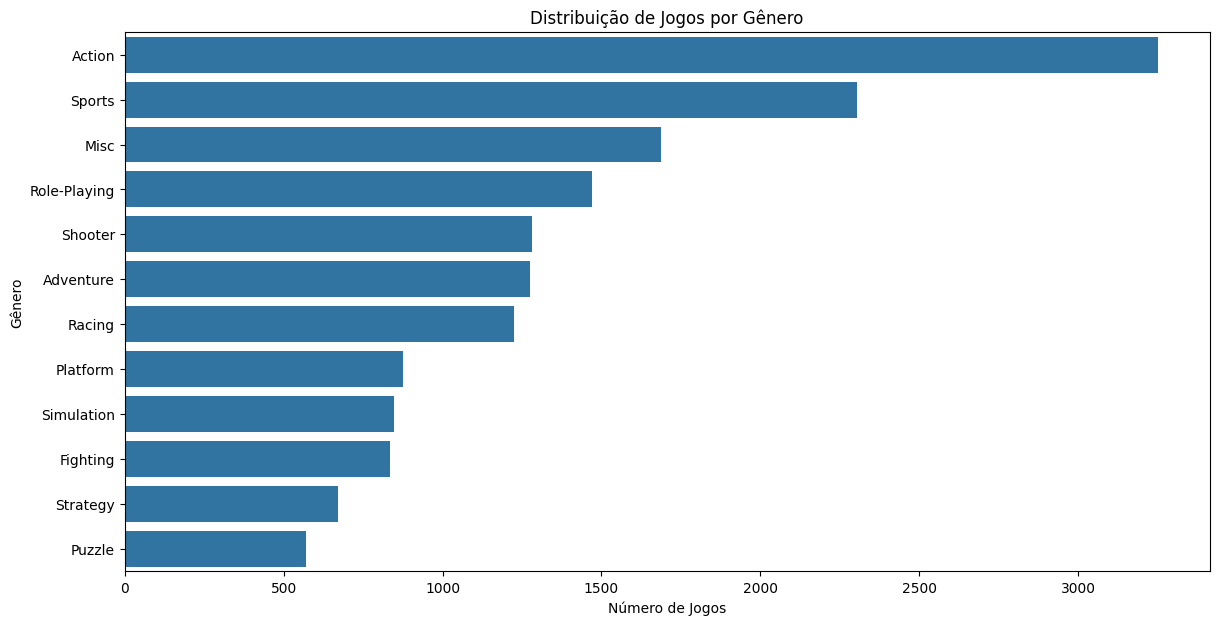

In [4]:

plt.figure(figsize=(14, 7))
sns.countplot(y='Genre', data=games_data, order=games_data['Genre'].value_counts().index)
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Número de Jogos')
plt.ylabel('Gênero')
plt.show()


### 3.2 Distribuição de Jogos por Plataforma

Aqui, analisamos quantos jogos foram lançados em cada plataforma, o que pode nos ajudar a entender quais consoles foram mais populares ao longo do tempo.

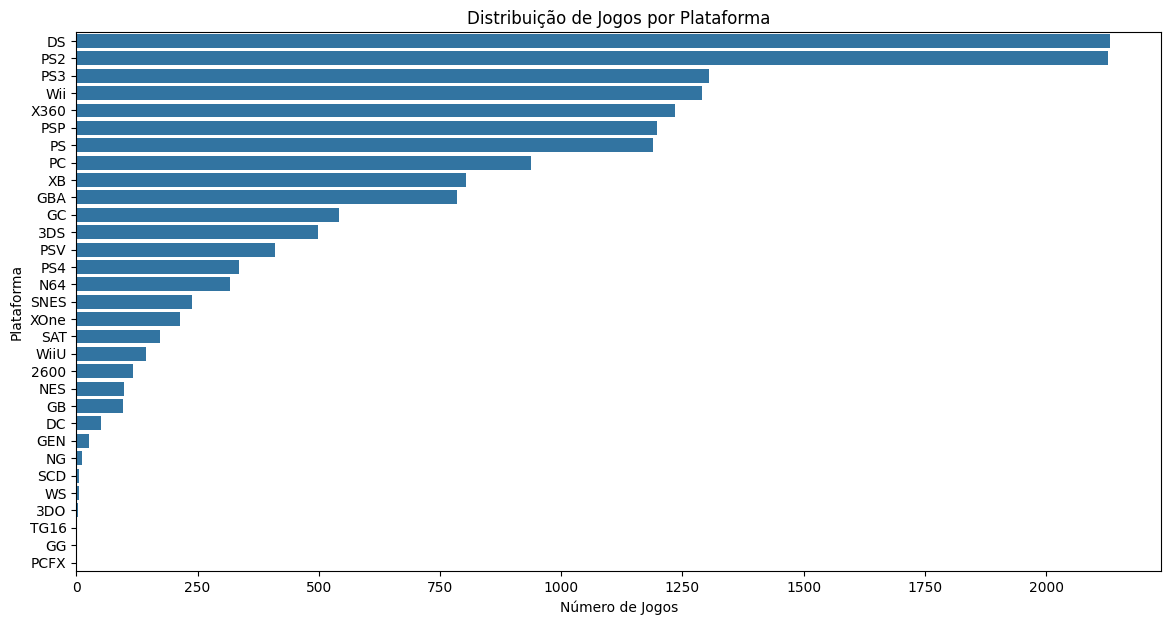

In [5]:

plt.figure(figsize=(14, 7))
sns.countplot(y='Platform', data=games_data, order=games_data['Platform'].value_counts().index)
plt.title('Distribuição de Jogos por Plataforma')
plt.xlabel('Número de Jogos')
plt.ylabel('Plataforma')
plt.show()


### 3.3 Distribuição de Jogos por Publicadora

Nesta análise, verificamos quais publicadoras lançaram mais jogos. Isso pode fornecer informações sobre a dominância de certas empresas no mercado.

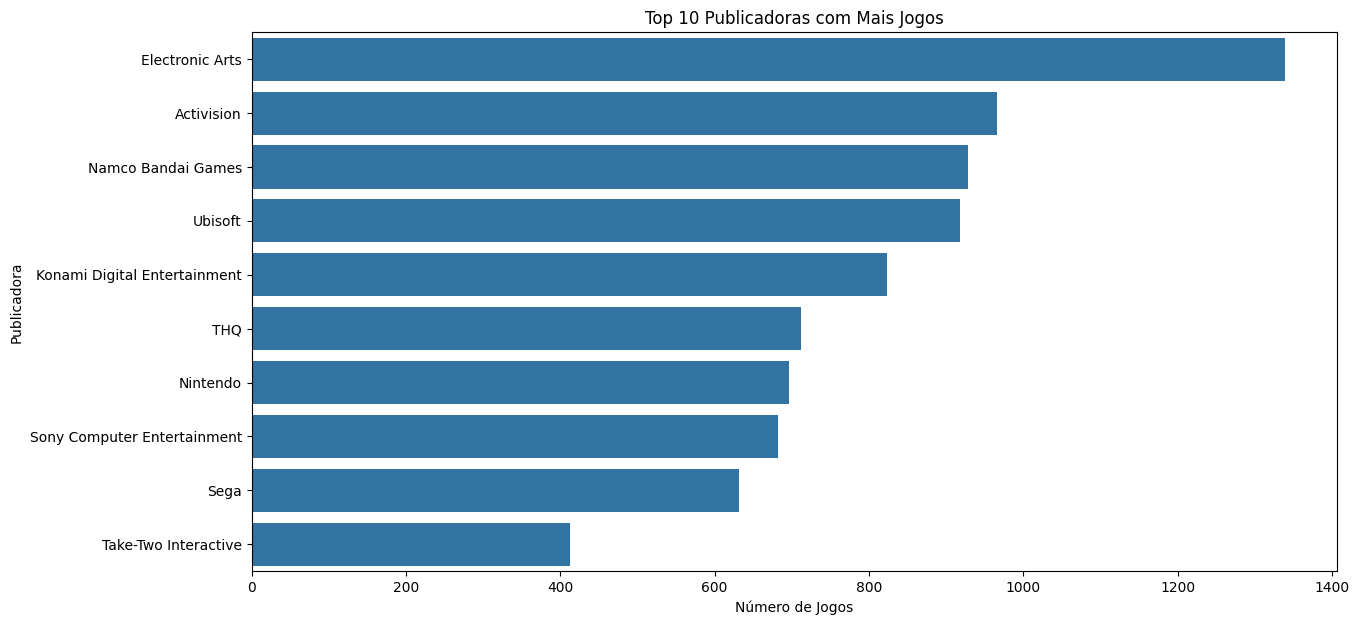

In [6]:

top_publishers = games_data['Publisher'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publicadoras com Mais Jogos')
plt.xlabel('Número de Jogos')
plt.ylabel('Publicadora')
plt.show()


### 3.4 Análise de Vendas por Região

Analisamos o total de vendas em diferentes regiões (América do Norte, Europa, Japão, etc.) para entender onde os jogos são mais populares.

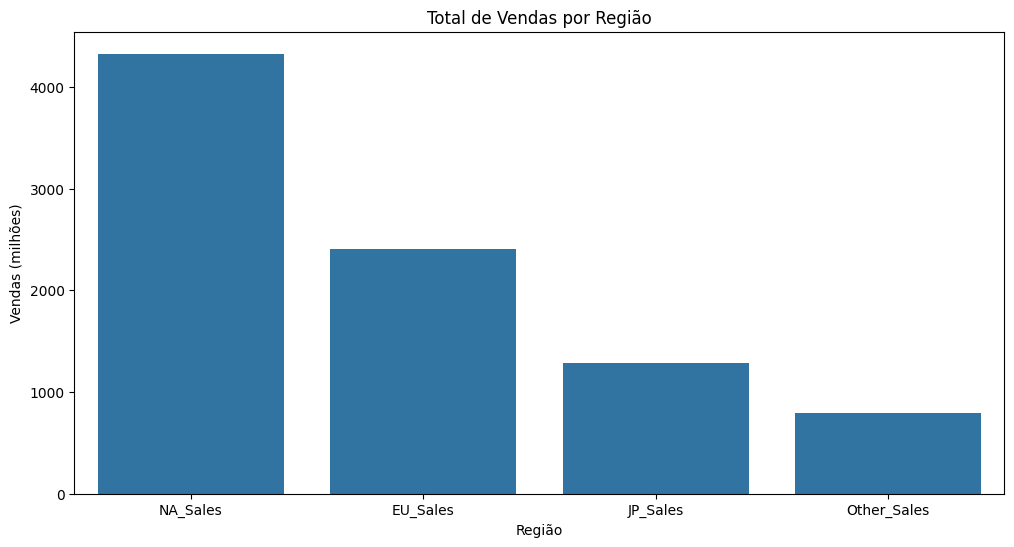

In [7]:

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = games_data[regions].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas (milhões)')
plt.show()


### 3.5 Tendência de Vendas ao Longo dos Anos

Analisamos a evolução das vendas globais ao longo dos anos para identificar tendências e padrões no mercado de jogos.

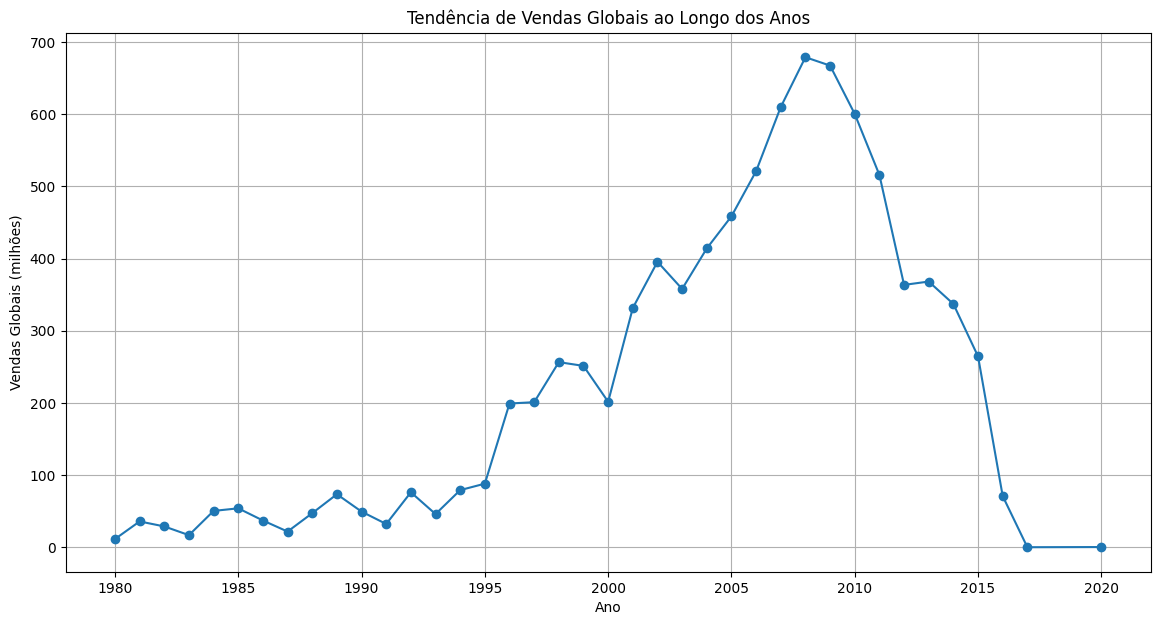

In [8]:

yearly_sales = games_data.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(14, 7))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.title('Tendência de Vendas Globais ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.show()


### 3.6 Matriz de Correlação entre Vendas por Região

Usamos uma matriz de correlação para entender como as vendas em diferentes regiões estão relacionadas.

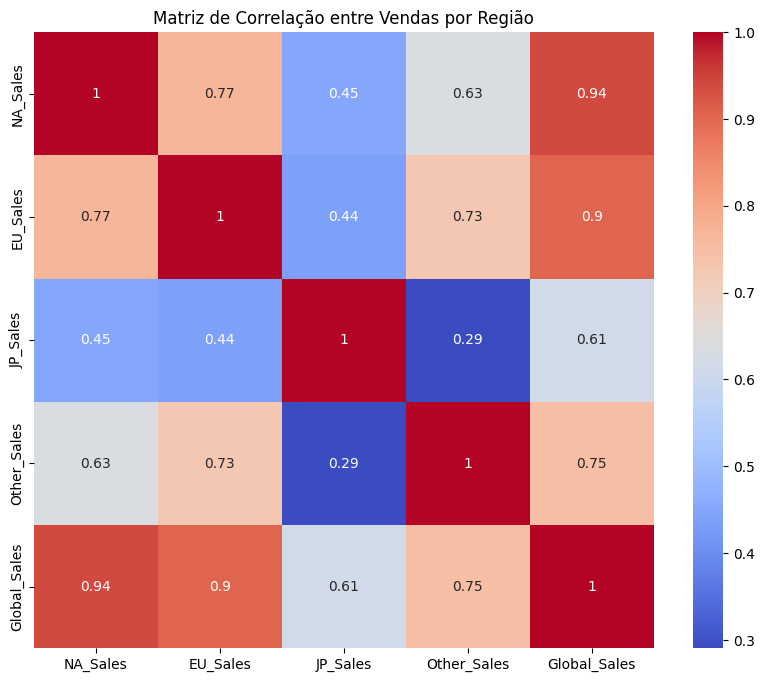

In [9]:

plt.figure(figsize=(10, 8))
sns.heatmap(games_data[regions + ['Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Vendas por Região')
plt.show()


# 4. Modelo de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

success_threshold = 1.0
games_data['Success'] = (games_data['Global_Sales'] > success_threshold).astype(int)

X = games_data[['Genre', 'Platform', 'Year', 'Publisher']]
y = games_data['Success']

encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X[['Genre', 'Platform', 'Publisher']])
X_encoded = np.hstack((X_encoded, X[['Year']].values))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Treinamento e Avaliação do Modelo

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.8708192697146364
Matriz de Confusão:
 [[2708  172]
 [ 249  130]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2880
           1       0.43      0.34      0.38       379

    accuracy                           0.87      3259
   macro avg       0.67      0.64      0.65      3259
weighted avg       0.86      0.87      0.86      3259



# 5. Conclusão

Com base nas análises realizadas, conseguimos identificar padrões de vendas por região, plataforma e gênero. Esses insights podem ajudar a direcionar estratégias de marketing e decisões de negócios.